<h1 style="text-align:center">Deep Learning   </h1>
<h1 style="text-align:center"> Lab Session 2 - 3 Hours </h1>
<h1 style="text-align:center"> Convolutional Neural Network (CNN) for Handwritten Digits Recognition</h1>

<b> Student 1:</b> Collura  
<b> Student 2:</b> Spano
 
 
The aim of this session is to practice with Convolutional Neural Networks. Answers and experiments should be made by groups of one or two students. Each group should fill and run appropriate notebook cells. 


Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an pdf document using print as PDF (Ctrl+P). Do not forget to run all your cells before generating your final report and do not forget to include the names of all participants in the group. The lab session should be completed by May 29th 2017.

Send you pdf file to benoit.huet@eurecom.fr and olfa.ben-ahmed@eurecom.fr using **[DeepLearning_lab2]** as Subject of your email.

# Introduction

In the last Lab Session, you built a Multilayer Perceptron for recognizing hand-written digits from the MNIST data-set. The best achieved accuracy on testing data was about 97%.  Can  you do better than these results using a deep CNN ?
In this Lab Session, you will build, train and optimize in TensorFlow one of the early Convolutional Neural Networks:  **LeNet-5** to go to  more than 99% of accuracy. 






# Load MNIST Data in TensorFlow
Run the cell above to load the MNIST data that comes  with TensorFlow. You will use this data in **Section 1** and **Section 2**.

In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
import numpy as np
from __future__ import print_function, division

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
X_train, y_train           = mnist.train.images, mnist.train.labels
X_validation, y_validation = mnist.validation.images, mnist.validation.labels
X_test, y_test             = mnist.test.images, mnist.test.labels

print("Image Shape:    {}".format(X_train[0].shape))
print("Training Set:   {} samples".format(len(X_train)))
print("Validation Set: {} samples".format(len(X_validation)))
print("Test Set:       {} samples".format(len(X_test)))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Image Shape:    (784,)
Training Set:   55000 samples
Validation Set: 5000 samples
Test Set:       10000 samples


# Section 1 : My First Model in TensorFlow

Before starting with CNN, let's train and test in TensorFlow the example :
$y=softmax(Wx+b)$ seen in the DeepLearing course last week. 

This model reaches an accuracy of about 92 %.
You will also learn how to launch the tensorBoard https://www.tensorflow.org/get_started/summaries_and_tensorboard to  visualize the computation graph, statistics and learning curves. 

<b> Part 1 </b> : Read carefully the code in the cell below. Run it to perform training. 

In [2]:
from __future__ import print_function
import tensorflow as tf

# STEP 1

# Parameters
learning_rate = 0.01
training_epochs = 100
batch_size = 128
display_step = 1
logs_path = 'log_files/'  # useful for tensorboard

# tf Graph Input:  mnist data image of shape 28*28=784
x = tf.placeholder(tf.float32, [None, 784], name='InputData')
# 0-9 digits recognition,  10 classes
y = tf.placeholder(tf.float32, [None, 10], name='LabelData')

# Set model weights
W = tf.Variable(tf.zeros([784, 10]), name='Weights')
b = tf.Variable(tf.zeros([10]), name='Bias')

# Construct model and encapsulating all ops into scopes, making Tensorboard's Graph visualization more convenient
with tf.name_scope('Model'):
    # Model
    pred = tf.nn.softmax(tf.matmul(x, W) + b) # Softmax
with tf.name_scope('Loss'):
    # Minimize error using cross entropy
    cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred), reduction_indices=1))
with tf.name_scope('SGD'):
    # Gradient Descent
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
with tf.name_scope('Accuracy'):
    # Accuracy
    acc = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    acc = tf.reduce_mean(tf.cast(acc, tf.float32))

# Initializing the variables
init = tf.global_variables_initializer()
# Create a summary to monitor cost tensor
tf.summary.scalar("Loss", cost)
# Create a summary to monitor accuracy tensor
tf.summary.scalar("Accuracy", acc)
# Merge all summaries into a single op
merged_summary_op = tf.summary.merge_all()


# STEP 2 


# Launch the graph for training
with tf.Session() as sess:
    sess.run(init)
    # op to write logs to Tensorboard
    summary_writer = tf.summary.FileWriter(logs_path, graph=tf.get_default_graph())
    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            # Run optimization op (backprop), cost op (to get loss value)
            # and summary nodes
            _, c, summary = sess.run([optimizer, cost, merged_summary_op],
                                     feed_dict={x: batch_xs, y: batch_ys})
            # Write logs at every iteration
            summary_writer.add_summary(summary, epoch * total_batch + i)
            # Compute average loss
            avg_cost += c / total_batch
        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            print("Epoch: ", '%03d' % (epoch+1), "  =====> Loss =", "{:.9f}".format(avg_cost))

    print("Optimization Finished!")

    # Test model
    # Calculate accuracy
    print("Accuracy:", acc.eval({x: mnist.test.images, y: mnist.test.labels}))

Epoch:  001   =====> Loss = 1.286880517
Epoch:  002   =====> Loss = 0.732372994
Epoch:  003   =====> Loss = 0.600556255
Epoch:  004   =====> Loss = 0.536539477
Epoch:  005   =====> Loss = 0.497980226
Epoch:  006   =====> Loss = 0.471192791
Epoch:  007   =====> Loss = 0.451552956
Epoch:  008   =====> Loss = 0.435870850
Epoch:  009   =====> Loss = 0.423384324
Epoch:  010   =====> Loss = 0.413081253
Epoch:  011   =====> Loss = 0.404286997
Epoch:  012   =====> Loss = 0.396835232
Epoch:  013   =====> Loss = 0.390057605
Epoch:  014   =====> Loss = 0.384526679
Epoch:  015   =====> Loss = 0.379224125
Epoch:  016   =====> Loss = 0.374422165
Epoch:  017   =====> Loss = 0.370436110
Epoch:  018   =====> Loss = 0.366270154
Epoch:  019   =====> Loss = 0.363052302
Epoch:  020   =====> Loss = 0.359655030
Epoch:  021   =====> Loss = 0.356679903
Epoch:  022   =====> Loss = 0.353856440
Epoch:  023   =====> Loss = 0.350802896
Epoch:  024   =====> Loss = 0.348747151
Epoch:  025   =====> Loss = 0.346512059


<b> Part 2  </b>: Using Tensorboard, we can  now visualize the created graph, giving you an overview of your architecture and how all of the major components  are connected. You can also see and analyse the learning curves. 

To launch tensorBoard: 
- Go to the **TP2** folder, 
- Open a Terminal and run the command line **"tensorboard --logdir= log_files/"**, it will generate an http link ,ex http://666.6.6.6:6006,
- Copy this  link into your web browser 


Enjoy It !! 


# Section 2 : The 99% MNIST Challenge !

<b> Part 1 </b> : LeNet5 implementation

One you are now familar with **tensorFlow** and **tensorBoard**, you are in this section to build, train and test the baseline [LeNet-5](http://yann.lecun.com/exdb/lenet/)  model for the MNIST digits recognition problem.  

In more advanced step you will make some optimizations to get more than 99% of accuracy. The best model can get to over 99.7% accuracy! 

For more information, have a look at this list of results : http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html


<img src="lenet.png",width="800" height="600" align="center">
<center><span>Figure 1: Lenet 5 </span></center>





The LeNet architecture accepts a 32x32xC image as input, where C is the number of color channels. Since MNIST images are grayscale, C is 1 in this case.

--------------------------
**Layer 1: Convolutional.** The output shape should be 28x28x6 **Activation.** sigmoid **Pooling.** The output shape should be 14x14x6.

**Layer 2: Convolutional.** The output shape should be 10x10x16. **Activation.** sigmoid **Pooling.** The output shape should be 5x5x16.

**Flatten.** Flatten the output shape of the final pooling layer such that it's 1D instead of 3D.  You may need to use **flatten** `from tensorflow.contrib.layers import flatten`

**Layer 3: Fully Connected.** This should have 120 outputs. **Activation.** sigmoid

**Layer 4: Fully Connected.** This should have 84 outputs. **Activation.** sigmoid

**Layer 5: Fully Connected.** This should have 10 outputs. **Activation.** SoftMax

<b> Question 2.1.1 </b>  Implement the Neural Network architecture described above.
For that, your will use classes and functions from  https://www.tensorflow.org/api_docs/python/tf/nn. 

We give you some helper functions for weigths and bias initilization. Also you can refer to section 1. 


In [3]:
# Helper functions  for weigths and bias initilization 

def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

In [4]:
from tensorflow.contrib.layers import flatten

def LeNet5_Model(data, keep_prob, activation=tf.nn.sigmoid):    
    conv_1 = tf.nn.conv2d(data, weight_variable([5, 5, 1, 6]), [1, 1, 1, 1], 'VALID', name='conv_1')
    conv_1 = activation(conv_1 + bias_variable([24, 24, 6]), name='activation_conv_1')
    conv_1 = tf.nn.max_pool(conv_1, [1, 2, 2, 1], [1, 2, 2, 1], 'VALID')
        
    conv_2 = tf.nn.conv2d(conv_1, weight_variable([5, 5, 6, 16]), [1, 1, 1, 1], 'VALID', name='conv_2')
    conv_2 = activation(conv_2 + bias_variable([8, 8, 16]), name='activation_conv_2')
    conv_2 = tf.nn.max_pool(conv_2, [1, 2, 2, 1], [1, 2, 2, 1], 'VALID')
    
    flat = flatten(conv_2)
    
    layer_3 = tf.nn.dropout(activation(tf.matmul(flat, weight_variable([256, 120])) + bias_variable([1, 120]),
                                       name='activation_layer_3'),
                            keep_prob=keep_prob, name='dropout_layer_3')
    layer_4 = tf.nn.dropout(activation(tf.matmul(layer_3, weight_variable([120, 84])) + bias_variable([1, 84]),
                                       name='activation_layer_4'),
                            keep_prob=keep_prob, name='dropout_layer_4')
    layer_5 = tf.matmul(layer_4, weight_variable([84, 10])) + bias_variable([1, 10])
    return tf.nn.softmax(layer_5, name='output_layer')

<b> Question 2.1.2. </b>  Calculate the number of parameters of this model 

**Number of parameters in the model**  
We have 50000 images, of size 28x28x1, on which sometimes the dropout gets applied, so we need to multiply this by the keep factor --> 50000 x 28 x 28 x 1 x keep_factor = 39200000 x keep_factor

**Comment on the parameters chosen above**  
We start from images of dimension 28x28, on which we apply the convolutional layer. In this layer, we use a 5x5 filter, and since the image is not RGB, we use only one channel. As depicted in the picture above, we want to obtain 6 images, so we will use as filter [5,5,1,6]. The stride will be set to 1, so we will end up with 6 images, each 24x24. On these, we will apply the pooling layer, with a filter of [1,2,2,1], indicating the size of the window for each of the 4 dimensions of the convolutional layer ([batch, height, width, channels]). The same idea is applied to the following convolutional and max pooling layer. We can also notice how we introduced the dropout layers, that fit with the shape of the layer they come after, and have a parameter, keep_prob, that is going to be set to 1.0 each time it is not necessary to apply it.
 
 https://www.tensorflow.org/api_docs/python/tf/nn/conv2d
 https://www.tensorflow.org/api_docs/python/tf/nn/max_pool

<b> Question 2.1.3. </b>  Start the training with the parameters cited below:

     Learning rate = 0.1
     Loss Function: Cross entropy
     Optimisateur: SGD
     Number of training iterations = 10000
     The batch size = 128

In [5]:
# Training parameters 
learning_rate = 0.1
batch_size = 128
training_epochs = 200
display_step = 5
logs_path = 'log_files/'  # useful for tensorboard

<b> Question 2.1.4. </b>  Implement the evaluation function for accuracy computation 

In [6]:
def evaluate(model, y):
    # Accuracy
    acc = tf.equal(tf.argmax(model, 1), tf.argmax(y, 1))
    acc = tf.reduce_mean(tf.cast(acc, tf.float32))
    return acc

<b> Question 2.1.5. </b>  Implement training pipeline and run the training data through it to train the model.

- Before each epoch, shuffle the training set. 
- Print the loss per mini batch and the training/validation accuracy per epoch. (Display results every 100 epochs)
- Save the model after training
- Print after training the final testing accuracy 



In [7]:
import time

def train(learning_rate=0.1, optimizer_function=tf.train.GradientDescentOptimizer, batch_size=128, 
          training_epochs=50, drop_out=1.0, activation=tf.nn.sigmoid, display_step=5):
    tf.reset_default_graph()

    # tf Graph Input:  mnist data image of shape 28*28=784
    x = tf.placeholder(tf.float32, [None, 28, 28, 1], name='InputData')
    # 0-9 digits recognition,  10 classes
    y = tf.placeholder(tf.float32, [None, 10], name='LabelData')
    keep_prob = tf.placeholder(tf.float32)

    # Construct model and encapsulating all ops into scopes, making Tensorboard's Graph visualization more convenient
    with tf.name_scope('Model'):
        # Model
        model = LeNet5_Model(x, keep_prob, activation)
    with tf.name_scope('LeNet_Loss'):
        # Minimize error using cross entropy
        cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(model), reduction_indices=1))
        if activation == tf.nn.relu:
            cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(tf.clip_by_value(model, 1e-10, 1.0)), reduction_indices=1))
    with tf.name_scope('SGD'):
        # Gradient Descent
        optimizer = optimizer_function(learning_rate).minimize(cost)
    with tf.name_scope('LeNet_Accuracy'):
        acc = tf.equal(tf.argmax(model, 1), tf.argmax(y, 1))
        acc = tf.reduce_mean(tf.cast(acc, tf.float32))

    # Initializing the variables
    init = tf.global_variables_initializer()
    # Create a summary to monitor cost tensor
    tf.summary.scalar("LeNet_Loss", cost)
    # Create a summary to monitor accuracy tensor
    tf.summary.scalar("LeNet_Accuracy", acc)
    # Merge all summaries into a single op
    merged_summary_op = tf.summary.merge_all()
    
    losses = []
    val_accuracies = []
    
    # Initializing the session 
    print ("Start Training!")
    t0 = time.time()
    
    with tf.Session() as sess:
        sess.run(init)
        # op to write logs to Tensorboard
        summary_writer = tf.summary.FileWriter(logs_path, graph=tf.get_default_graph())
        # Training cycle
        for epoch in range(training_epochs):
            avg_cost = 0.
            total_batch = int(mnist.train.num_examples / batch_size)
            # Loop over all batches
            for i in range(total_batch):
                batch_xs, batch_ys = mnist.train.next_batch(batch_size)
                batch_xs = batch_xs.reshape([-1, 28, 28, 1])
                # Run optimization op (backprop), cost op (to get loss value)
                # and summary nodes
                _, c, summary = sess.run([optimizer, cost, merged_summary_op],
                                         feed_dict={x: batch_xs, y: batch_ys, keep_prob: drop_out})
                # Write logs at every iteration
                summary_writer.add_summary(summary, epoch * total_batch + i)
                # Compute average loss
                avg_cost += c / total_batch
                losses.append(avg_cost)
            # Display logs per epoch step
            if (epoch + 1) % display_step == 0:
                print("Epoch: ", '%02d' % (epoch+1), "  =====> Loss =", "{:.9f}".format(avg_cost))
            if (epoch + 1) % 10 == 0:
                val_acc = acc.eval({x: mnist.validation.images.reshape([-1, 28, 28, 1]), y: mnist.validation.labels, keep_prob: 1.0})
                val_accuracies.append(val_acc)
                print(" Validation Accuracy:", val_acc)
        
        accuracy = acc.eval({x: mnist.test.images.reshape([-1, 28, 28, 1]), y: mnist.test.labels, keep_prob: 1.0})
        print("Test Accuracy:", accuracy)

    t = time.time() - t0
    print ("Training Finished!")
    return model, losses, accuracy, val_accuracies, t

Start Training!
Epoch:  05   =====> Loss = 2.303415928
Epoch:  10   =====> Loss = 2.190832865
 Validation Accuracy: 0.3084
Epoch:  15   =====> Loss = 0.366103831
Epoch:  20   =====> Loss = 0.190124959
 Validation Accuracy: 0.9532
Epoch:  25   =====> Loss = 0.135990084
Epoch:  30   =====> Loss = 0.108872677
 Validation Accuracy: 0.9706
Epoch:  35   =====> Loss = 0.092189384
Epoch:  40   =====> Loss = 0.080016781
 Validation Accuracy: 0.9764
Epoch:  45   =====> Loss = 0.071709530
Epoch:  50   =====> Loss = 0.065094769
 Validation Accuracy: 0.9804
Epoch:  55   =====> Loss = 0.059921998
Epoch:  60   =====> Loss = 0.055351836
 Validation Accuracy: 0.9822
Epoch:  65   =====> Loss = 0.051046642
Epoch:  70   =====> Loss = 0.048004113
 Validation Accuracy: 0.984
Epoch:  75   =====> Loss = 0.045175176
Epoch:  80   =====> Loss = 0.042282800
 Validation Accuracy: 0.9838
Epoch:  85   =====> Loss = 0.039791159
Epoch:  90   =====> Loss = 0.037750466
 Validation Accuracy: 0.9844
Epoch:  95   =====> Lo

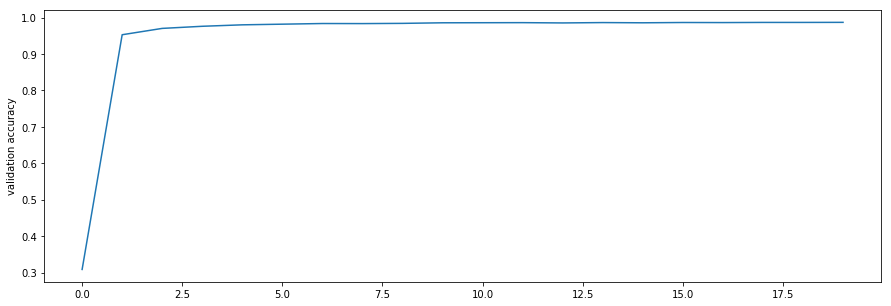

In [8]:
model, _, _, accuracies, t = train(learning_rate, tf.train.GradientDescentOptimizer,
                                   batch_size, training_epochs, display_step=5)
print('Total time', t)

plt.figure(figsize=(15,5))
plt.ylabel("validation accuracy")
plt.plot(accuracies)
plt.show()

<b> Question 2.1.6 </b> : Use tensorBoard to visualise and save the LeNet5 Graph and all learning curves. 
Save all obtained figures in the folder **"TP2/MNIST_99_Challenge_Figures"**

<img src="MNIST_99_Challenge_Figures/main_graph.png",width="800" height="600" align="center">
<center><span>Figure 2: Main Graph</span></center>

<img src="MNIST_99_Challenge_Figures/graph_run=.png",width="1000" height="900" align="center">
<center><span>Figure 3: Model</span></center>

We can see how the performance has increased with respect to the previously proposed code, reaching 98% on both validation and test sets.

<b> Part 2 </b> : LeNET 5 Optimization


<b> Question 2.2.1 </b>  Change the sigmoid function with a Relu :

- Retrain your network with SGD and AdamOptimizer and then fill the table above  :


| Optimizer            |  Gradient Descent         |AdamOptimizer |
| -------------        |:-------------: | :---------:   |
| Learning rate |  0.1 | 0.001 |
| Batch size | 50  | 50 |
| Validation Accuracy  |     99.18 %   | 99.08%   |      
| Testing Accuracy     |   99.13 %  | 99.16 %  |       
| Training Time        |     2223s      |       2279s  |  

We filled the table using the best configurations for each optimizer.


- Try with different learning rates for each Optimizer (0.0001 and 0.001 ) and different Batch sizes (50 and 128) for 20000 Epochs. 

- For each optimizer, plot (on the same curve) the **testing accuracies** function to **(learning rate, batch size)** 



- Did you reach the 99% accuracy ? What are the optimal parametres that gave you the best results? 








In [9]:
optimizers = [tf.train.GradientDescentOptimizer, tf.train.AdamOptimizer]
learning_rates = [0.1, 0.001, 0.0001]
batch_sizes = [128, 50]
epochs = 100

results = []
a = []
x = []

for optimizer in optimizers:
    for learning_rate in learning_rates:
        for batch_size in batch_sizes:
            print("Training with optimizer: %s\nlearning rate: %f\nbatch size: %d" %(optimizer, learning_rate, batch_size))
            model, losses, accuracy, validation, t = train(learning_rate, optimizer, batch_size, epochs, activation=tf.nn.relu)
            results.append((optimizer, learning_rate, batch_size, model, losses, accuracy, validation, t))
            print('----------------------------------------------------------------------')

Training with optimizer: <class 'tensorflow.python.training.gradient_descent.GradientDescentOptimizer'>
learning rate: 0.100000
batch size: 128
Start Training!
Epoch:  05   =====> Loss = 0.046924116
Epoch:  10   =====> Loss = 0.023754892
 Validation Accuracy: 0.9898
Epoch:  15   =====> Loss = 0.013551907
Epoch:  20   =====> Loss = 0.006710365
 Validation Accuracy: 0.9908
Epoch:  25   =====> Loss = 0.004497792
Epoch:  30   =====> Loss = 0.001107732
 Validation Accuracy: 0.9904
Epoch:  35   =====> Loss = 0.000430618
Epoch:  40   =====> Loss = 0.000273027
 Validation Accuracy: 0.9918
Epoch:  45   =====> Loss = 0.000177059
Epoch:  50   =====> Loss = 0.000134622
 Validation Accuracy: 0.9912
Epoch:  55   =====> Loss = 0.000112514
Epoch:  60   =====> Loss = 0.000093618
 Validation Accuracy: 0.9914
Epoch:  65   =====> Loss = 0.000083562
Epoch:  70   =====> Loss = 0.000072000
 Validation Accuracy: 0.9914
Epoch:  75   =====> Loss = 0.000063038
Epoch:  80   =====> Loss = 0.000056835
 Validation A

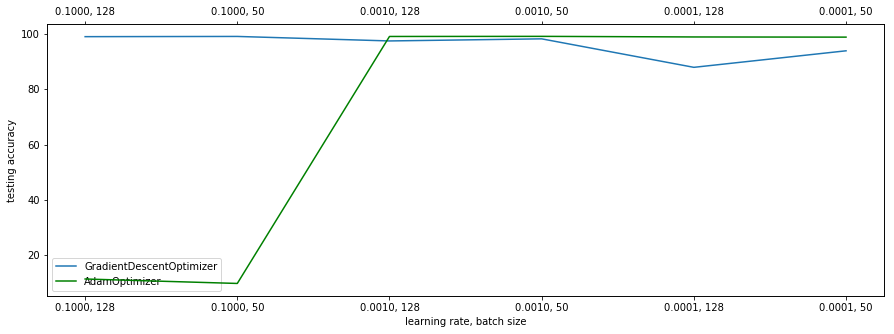

In [10]:
gdo = { 'x': [], 'y': [] }
ado = { 'x': [], 'y': [] }

for optimizer, learning_rate, batch_size, model, losses, accuracy, validation, t in results:
    if optimizer == tf.train.GradientDescentOptimizer:
        gdo['y'].append(accuracy * 100)
        gdo['x'].append("%.4f, %d" %(learning_rate, batch_size))
    else:
        ado['y'].append(accuracy * 100)
        ado['x'].append("%.4f, %d" %(learning_rate, batch_size))
fig, ax = plt.subplots(figsize=(15,5))

ax.set_xlabel("learning rate, batch size")
ax.set_ylabel("testing accuracy")
lns1 = ax.plot(gdo['y'], label='GradientDescentOptimizer')
ax.set_xticks(np.arange(len(gdo['x'])))
ax.set_xticklabels(gdo['x'])

ax1 = ax.twiny()
lns2 = ax1.plot(ado['y'], color='green', label='AdamOptimizer')
ax1.set_xticks(np.arange(len(ado['x'])))
ax1.set_xticklabels(ado['x'])

lns = lns1 + lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0)

plt.show()

In [28]:
for result in results:
    print('optimizer:', result[0], '\n\tlearning rate:', result[1],
          '\n\tbatch size:', result[2], '\n\ttime:', result[-1], 'seconds',
          '\n\ttest accuracy:', result[-3] * 100, '%'
         )

optimizer: <class 'tensorflow.python.training.gradient_descent.GradientDescentOptimizer'> 
	learning rate: 0.1 
	batch size: 128 
	time: 1566.84127498 seconds 
	test accuracy: 99.0499973297 %
optimizer: <class 'tensorflow.python.training.gradient_descent.GradientDescentOptimizer'> 
	learning rate: 0.1 
	batch size: 50 
	time: 2223.43170905 seconds 
	test accuracy: 99.1299986839 %
optimizer: <class 'tensorflow.python.training.gradient_descent.GradientDescentOptimizer'> 
	learning rate: 0.001 
	batch size: 128 
	time: 1614.17756891 seconds 
	test accuracy: 97.5000023842 %
optimizer: <class 'tensorflow.python.training.gradient_descent.GradientDescentOptimizer'> 
	learning rate: 0.001 
	batch size: 50 
	time: 2238.5198822 seconds 
	test accuracy: 98.2599973679 %
optimizer: <class 'tensorflow.python.training.gradient_descent.GradientDescentOptimizer'> 
	learning rate: 0.0001 
	batch size: 128 
	time: 1619.25216579 seconds 
	test accuracy: 87.9499971867 %
optimizer: <class 'tensorflow.python

<div class='alert alert-warning'>
As we can see, AdamOptimizer doesn't work well with higher learning rates. This is due to the fact that AdamOptimizer dynamically performs updates to the learning rate while training.
According to the [Tensorflow documentation](https://www.tensorflow.org/api_docs/python/tf/train/AdamOptimizer) and this [paper](https://arxiv.org/pdf/1412.6980.pdf) the learning rate is updated as follows:

<pre>
    \_\_init__(
        learning_rate=0.001,
        beta1=0.9,
        beta2=0.999,
        epsilon=1e-08,
        use_locking=False,
        name='Adam'
    )

    # Initialization:

    m_0 <- 0 (Initialize initial 1st moment vector)
    v_0 <- 0 (Initialize initial 2nd moment vector)
    t <- 0 (Initialize timestep)

    # The update rule for variable with gradient g uses an optimization 
    # described at the end of section2 of the paper:

    t <- t + 1
    lr_t <- learning_rate * sqrt(1 - beta2^t) / (1 - beta1^t)

    m_t <- beta1 * m_{t-1} + (1 - beta1) * g
    v_t <- beta2 * v_{t-1} + (1 - beta2) * g * g
    variable <- variable - lr_t * m_t / (sqrt(v_t) + epsilon)
</pre>

Big initial values for `learning_rate` lead to bigger variations of the actual learning rate.

Meanwhile, the GradientDescentOptimizer performs well with learning rates like 0.1. Very small learning rates, like 0.0001, the optimizer would require very long training time to achieve 99% of accuracy on validation and test.
</div>

The best configuration we found in the previous trial is the one that gives us the highest test accuracy:
```
optimizer: <class 'tensorflow.python.training.adam.AdamOptimizer'> 
	learning rate: 0.001 
	batch size: 50 
	time: 2279.71327019 seconds 
	test accuracy: 99.1599977016 %
```

<b> Question 2.2.2 </b>  What about applying a dropout layer on the Fully conntected layer and then retraining the model with the best Optimizer and parameters(Learning rate and Batsh size) obtained in *Question 2.2.1*  ? (probability to keep units=0.75). For this stage ensure that the keep prob is set to 1.0 to evaluate the 
performance of the network including all nodes.

Since we are introducing dropout, we expect the learning to be faster, so we decrease the number of training epochs, to avoid overfitting. (The code has been already implemented above in the `LeNet5_Model` function).

In [ ]:
optimizer = tf.train.AdamOptimizer
learning_rate = 0.001
batch_size = 50
epochs = 50
model, losses, accuracy, validation, t = train(learning_rate, optimizer, batch_size, epochs, 
                                               activation=tf.nn.relu, drop_out=0.75)

As expect the learning was faster and we achieved 99% of accuracy after only 10 epochs.